In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

In [2]:
data = pd.read_csv('data/datatelecom_churn.csv', sep=',')
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
data.drop(['State', 'Voice mail plan'], axis = 1, inplace = True)

In [4]:
data['International plan'] = data['International plan'].map({'Yes': 1, 'No': 0})
data.head()

,Account length,Area code,International plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,408,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,415,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
y = data['Churn'].astype(int)
X = data.drop('Churn', axis = 1)

### Дерева рішень

Дерево решений — тип контролируемого машинного обучения, который в основном используется в задачах классификации. Дерево решений само по себе — это в основном жадное, нисходящее, рекурсивное разбиение. «Жадное», потому что на каждом шагу выбирается лучшее разбиение. «Сверху вниз» — потому что мы начинаем с корневого узла, который содержит все записи, а затем делается разбиение.
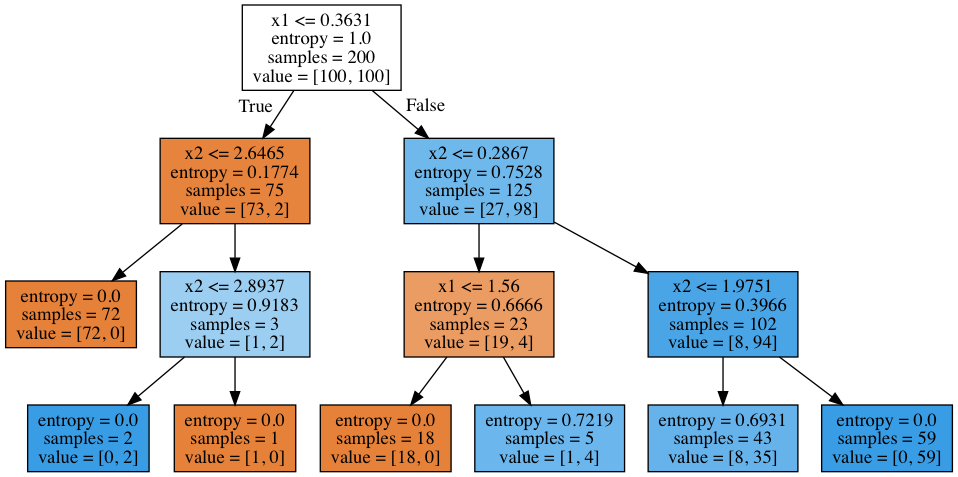

In [6]:
from sklearn.model_selection import train_test_split, cross_val_score

In [7]:
# Розбиття м-ці X та y на дві частини кожну
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = .3, random_state = 17)

In [8]:
# Сворення екземпляру класифікатора із random_state = 17
first_tree = DecisionTreeClassifier(random_state = 17)

In [9]:
# Середня якість Кросс-валідації(долі правильних відповідей на 30% даних -- тестових) БЕЗ налаштування параметрів
np.mean(cross_val_score(first_tree, X_train, y_train, cv = 5))

0.9138423504976518

### KNN - метод найближчих сусідів
Основная его идея в том, что для точки, для которой мы хотим сделать прогноз, можно использовать близлежащие точки, целевые переменные которых мы уже знаем. Легче всего это уяснить с помощью рисунка (см. слайд). У нас есть ряд обучающих данных, имеющих два типа целевых переменных: зеленые и красные. Таким образом, это двоичная классификация. Наши целевые переменные ещё называются метками или классами.
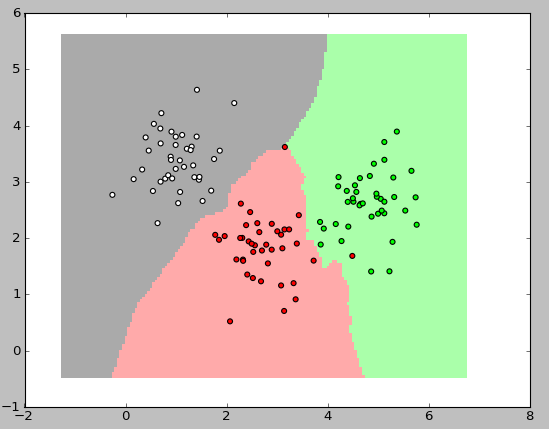

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
first_knn = KNeighborsClassifier()

In [12]:
np.mean(cross_val_score(first_knn, X_train, y_train, cv = 5))

0.8671274043984523

### Підбір максимальної глибини методу дерева

Теперь настроим параметры дерева на кросс-валидации. Настраивать будем максимальную глубину и максимальное используемое на каждом разбиении число признаков. Суть того, как работает GridSearchCV: для каждой уникальной пары значений параметров max_depth и max_features будет проведена 5-кратная кросс-валидация и выберется лучшее сочетание параметров.

In [13]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [14]:
# перебір по всіх параметрах (40 шт)
tree_params = {"max_depth": np.arange(1, 11), "max_features": [0.5, 0.7, 0.9, 1]}

In [15]:
# n_jobs = -1 --> усі ядра процесора
tree_grid = GridSearchCV(first_tree, tree_params, cv=5, n_jobs=-1)

In [16]:
%%time
tree_grid.fit(X_train, y_train)

Wall time: 1.99 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=17), n_jobs=-1,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'max_features': [0.5, 0.7, 0.9, 1]})

In [17]:
tree_grid.best_score_, tree_grid.best_params_

(0.9417117754638777, {'max_depth': 6, 'max_features': 0.9})

In [18]:
accuracy_score(y_train, tree_grid.predict(X_train))

0.9644234890698671

### Підбір максимальної глибини методу найближчих сусідів

In [19]:
knn_params = {'n_neighbors': range(5, 30, 5)}

In [20]:
knn_grid = GridSearchCV(first_knn, knn_params, cv=5, n_jobs=-1)

In [21]:
%%time
knn_grid.fit(X_train, y_train)

Wall time: 208 ms


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(5, 30, 5)})

In [22]:
knn_grid.best_score_, knn_grid.best_params_

(0.8701289391697531, {'n_neighbors': 10})

In [23]:
accuracy_score(y_train, knn_grid.predict(X_train))

0.87912558936991

### Взяті оптимальні параметри методу дерева

In [24]:
tree_grid.best_estimator_

DecisionTreeClassifier(max_depth=6, max_features=0.9, random_state=17)

In [25]:
# Прогноз дерева за відкладеною вибіркою:
tree_grid_predict = tree_grid.predict(X_valid);

In [26]:
# Перевірка точності Кросс-валідації (перевірка реальних міток та прогнозу)
accuracy_score(y_valid,  tree_grid_predict)

0.946

In [27]:
# Нижня межа точності Кросс-валідації для коректної роботи програми 
1 - np.mean(y)

0.8550855085508551

## Навчання та налаштування моделі "випадкового лісу"
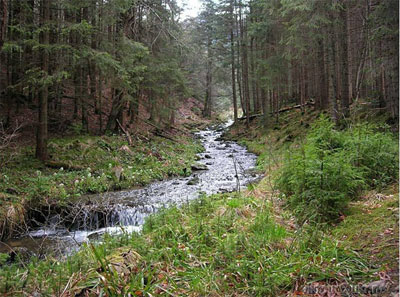

Випадковий ліс - це конструкція даних, застосована до машинного навчання, яка розробляє велику кількість дерев випадкових рішень, аналізуючи набори змінних. Цей тип алгоритму допомагає вдосконалити способи технологій аналізу складних даних.

Взагалі дерева рішень популярні для завдань машинного навчання. У випадковому лісі інженери будують набори дерев випадкових рішень, щоб більш ретельно ізолювати знання від обміну даними, з різними застосованими змінними масивами. Одним із способів описати філософію, що стоїть за випадковим лісом, є те, що оскільки випадкові дерева мають певне перекриття, інженери можуть будувати системи для надмірного вивчення даних з різними деревами та шукати тенденції та зразки, що підтримують даний результат даних. Наприклад, якщо п'ять випадкових дерев надають інформацію про ту саму змінну з підмножини, і чотири з них погоджуються, алгоритм машинного навчання може використовувати цей «голос більшості» для побудови моделей на основі ймовірностей. У багатьох різних видах машинного навчання такі конструкції, як випадковий ліс, можуть допомогти технологічним системам деталізувати дані та забезпечити більш складний аналіз.

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=17)
print(np.mean(cross_val_score(forest, X_train, y_train, cv=5))) # 0.949

0.9468527998088427


In [30]:
forest_params = {'max_depth': range(1,11), 'max_features': range(4,19)}

In [31]:
forest_grid = GridSearchCV(forest, forest_params, cv=5, n_jobs=-1, verbose=True)

In [32]:
%%time
forest_grid.fit(X_train, y_train);

Fitting 5 folds for each of 150 candidates, totalling 750 fits
Wall time: 46 s


c:\users\mike\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.8499784  0.85040667 0.84912187 0.84826626 0.84826626 0.85084045
 0.85340912 0.85812831 0.85812831 0.85727178 0.85727178 0.85340912
 0.85340912 0.85383831        nan 0.86069607 0.86969975 0.87484354
 0.8782715  0.87355598 0.87312772 0.87398517 0.8769867  0.87784691
 0.88256794 0.88213875 0.88513569 0.88941927 0.89370192        nan
 0.87741313 0.87998548 0.88255875 0.88898641 0.90141622 0.90484234
 0.90612714 0.9065554  0.9048405  0.90569795 0.90526877 0.90441316
 0.90783928 0.90698275        nan 0.88855539 0.90442143 0.91470164
 0.91769582 0.92069552 0.92755236 0.9344184  0.93613697 0.93570779
 0.93056492 0.93570871 0.92841808 0.9267041  0.92499012        nan
 0.91255847 0.92755328 0.9348439  0.93656156 0.9404233  0.94385402
 0.94556708 0.94471055 0.94470963 0.94513882 0.9451379  0.94471055
 0.94385218 0.9451379    

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=17),
             n_jobs=-1,
             param_grid={'max_depth': range(1, 11),
                         'max_features': range(4, 19)},
             verbose=True)

In [33]:
forest_grid.best_score_, forest_grid.best_params_

(0.9494260690555183, {'max_depth': 10, 'max_features': 9})

In [34]:
accuracy_score(y_train, forest_grid.predict(X_train)) # 0.953

0.9807115302186027

## Візуалізація даних

In [35]:
import graphviz
from sklearn import tree

In [36]:
# Для Linux:
# !dot -Tpng '../../img/deep_toy_tree.dot' -o '../../img/deep_toy_tree.png'

In [37]:
dot_data = tree.export_graphviz(tree_grid.best_estimator_, out_file='data/telecom_tree.dot', feature_names = X.columns ,filled = True, rounded=True,special_characters=True)
graph = graphviz.Source(dot_data)

In [38]:
graph;

In [39]:
# ------------------------------------